![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/Comp-1.gif)

# Setup

In [1]:
pip install mathutils

     |████████████████████████████████| 226 kB 2.9 MB/s 
  Created wheel for mathutils: filename=mathutils-2.81.2-cp36-cp36m-linux_x86_64.whl size=575822 sha256=266c1c1c4494ed7343780bb41243a52966990719be49169ecd402f072e95810f
  Stored in directory: /root/.cache/pip/wheels/f5/32/e6/7ba18cb7e44122dfe8fd0243779920c1ceea1b09209d2b5739
Successfully built mathutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from preprocessing import *
from mathutils import *

%matplotlib inline

sns.set(style='whitegrid')

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras+Python+Tutorial/content_content_neuron.png)

# Let us start by answering this key question: What is a neural network? 
It is a biologically-inspired method of building computer programs that are able to learn and independently find connections in data. As Figure shows, nets are a collection of software ‘neurons’ arranged in layers, connected together in a way that allows communication.

# Single neuron

Each neuron receives a set of x-values (numbered from 1 to n) as an input and compute the predicted y-hat value. Vector x actually contains the values of the features in one of m examples from the training set. What is more each of units has its own set of parameters, usually referred to as w (column vector of weights) and b (bias) which changes during the learning process. In each iteration, the neuron calculates a weighted average of the values of the vector x, based on its current weight vector w and adds bias. Finally, the result of this calculation is passed through a non-linear activation function g. I will mention a bit about the most popular activation functions in the following part of the article.

![](https://hackernoon.com/drafts/e8m3z48.png)

# Perceptrons 
Invented by Frank Rosenblatt in 1957, are the simplest neural network that consist of n number of inputs, only one neuron and one output, where n is the number of features of our dataset. The process of passing the data through the neural network is know as forward propagation and the forward propagation carried out in a Perceptron is explained in the following three steps:

**Step 1** : For each input, multiply the input value xᵢ with weights wᵢ and sum all the multiplied values. Weights — represent the strength of the connection between neurons and decides how much influence the given input will have on the neuron’s output. If the weight w₁ has higher value than the weight w₂, then the input x₁ will have higher influence on the output than w₂.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-cjpc3zpj)

The row vectors of the inputs and weights are x = [x₁, x₂, … , xₙ] and w =[w₁, w₂, … , wₙ] respectively and their dot product is given by

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-tas83zhq)

Hence, the summation is equal to the dot product of the vectors x and w

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-h4ud3zb3)

**Step 2** : Add bias b to the summation of multiplied values and let’s call this z. Bias — also know as offset is necessary in most of the cases, to move the entire activation function to the left or right to generate the required output values .

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-gixa3z5p)

**Step 3** : Pass the value of z to a non-linear activation function. Activation functions — are used to introduce non-linearity into the output of the neurons, without which the neural network will just be a linear function. Moreover, they have a significant impact on the learning speed of the neural network. Perceptrons have binary step function as their activation function. However, we shall use Sigmoid — also know as logistic function as our activation function.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-i3y23z0r)

where, σ denotes the Sigmoid activation function and the output we get after the forward prorogation is know as the predicted value ŷ.

# Learning Algorithm
The learning algorithm consist of two parts — Backpropagation and Optimization.
Backpropagation : Backpropagation, short for backward propagation of errors, refers to the algorithm for computing the gradient of the loss function with respect to the weights. However, the term is often used to refer to the entire learning algorithm. The backpropagation carried out in a Perceptron is explained in the following two steps: 

**Step 1** : To know an estimation of how far are we from our desired solution a loss function is used. Generally, Mean Squared Error is chosen as loss function for regression problems and cross entropy for classification problems. Let’s take a regression problem and its loss function be Mean Squared Error, which squares the difference between actual (yᵢ) and predicted value ( ŷᵢ ).

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-v2z33z6t)

Loss function is calculated for the entire training dataset and their average is called the Cost function C.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-uy1263zz5)

**Step 2** : In order to find the best weights and bias for our Perceptron, we need to know how the cost function changes in relation to weights and bias. This is done with the help the gradients (rate of change) — how one quantity changes in relation to another quantity. In our case, we need to find the gradient of the cost function with respect to the weights and bias.
Let’s calculate the gradient of cost function C with respect to the weight wᵢ using partial derivation. Since the cost function is not directly related to the weight wᵢ, let’s use the chain rule.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-9j13t3zkz)

Now we need to find the following three gradients

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-y014q3zg9)

Let’s start with the gradient of the Cost function (C) with respect to the predicted value ( ŷ )

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-wp15t3za8)

Let y = [y₁ , y₂ , … yₙ] and ŷ =[ ŷ₁ , ŷ₂ , … ŷₙ] be the row vectors of actual and predicted values. Hence the above equation is simplifies as

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-y916m3zu2)

Now let’s find the the gradient of the predicted value with respect to the z. This will be a bit lengthy.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-731773zg4)

The gradient of z with respect to the weight wᵢ is

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-gp1863zl1)

Therefore we get,

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-wf18z3zw3)

What about Bias? — Bias is theoretically considered to have an input of constant value 1. Hence,

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-p819q3z83)

# Optimization : 
Optimization is the selection of a best element from some set of available alternatives, which in our case, is the selection of best weights and bias of the perceptron. Let’s choose gradient descent as our optimization algorithm, which changes the weights and bias, proportional to the negative of the gradient of the Cost function with respect to the corresponding weight or bias. Learning rate (α) is a hyperparameter which is used to control how much the weights and bias are changed.

The weights and bias are updated as follows and the Backporpagation and gradient descent is repeated until convergence.

![](https://hackernoon.com/photos/0s78blBiawOe4UYlnA9SeCIgjbA3-sh1ah3z3v)

# Single layer

Now let’s zoom out a little and consider how calculations are performed for a whole layer of the neural network. We will use our knowledge of what is happening inside a single unit and vectorize across full layer to combine those calculations in into matrix equations. To unify the notation, the equations will be written for the selected layer. By the way, subscript i mark the index of a neuron in that layer.

![](https://miro.medium.com/max/1400/1*uj8zOKLfcsyba3wjqQeF3w.png)

# One more important remark: 

When we wrote the equations for a single unit, we used x and y-hat, which were respectively the column vector of features and the predicted value. When switching to the general notation for layer, we use the vector a — meaning the activation of the corresponding layer. The x vector is therefore the activation for layer 0 — input layer. Each neuron in the layer performs a similar calculation according to the following equations:

![](https://miro.medium.com/max/626/1*EFl7IyV_w_oNB_capLSqmw.gif)

For the sake of clarity, let’s write down the equations for example for layer 2:

![](https://miro.medium.com/max/630/1*yPUUwhGKd1jIU_nmDRIz6Q.gif)

As you can see, for each of the layers we have to perform a number of very similar operations. Using for-loop for this purpose is not very efficient, so to speed up the calculation we will use vectorization. First of all, by stacking together horizontal vectors of weights w (transposed) we will build matrix W. Similarly, we will stack together bias of each neuron in the layer creating vertical vector b. Now there is nothing to stop us from building a single matrix equations that allows us to perform calculations for all the neurons of the layer at once. Let’s also write down the dimensions of the matrices and vectors we have used.

![](https://miro.medium.com/max/1400/1*wab5q35QBAxZ-4sMGKxcFA.png)

![](https://miro.medium.com/max/660/1*UmrwDSFuBv2XMrf6lY8dww.gif)

![](https://miro.medium.com/max/1400/1*TH4MWXi0QPEF2eKrcaWZkw.png)

# Vectorizing across multiple examples

The equation that we have drawn up so far involves only one example. During the learning process of a neural network, you usually work with huge sets of data, up to millions of entries. The next step will therefore be vectorisation across multiple examples. Let’s assume that our data set has m entries with nx features each. First of all, we will put together the vertical vectors x, a, and z of each layer creating the X, A and Z matrices, respectively. Then we rewrite the previously laid-out equation, taking into account the newly created matrices.

![](https://miro.medium.com/max/1400/1*95uERWPdhqRSmnLzWurZ_w.png)

![](https://miro.medium.com/max/674/1*RA5I9ZG5Lsaj2W40o15omg.gif)

# What is activation function and why do we need it?

Activation functions are one of the key elements of the neural network. Without them, our neural network would become a combination of linear functions, so it would be just a linear function itself. Our model would have limited expansiveness, no greater than logistic regression. The non-linearity element allows for greater flexibility and creation of complex functions during the learning process. The activation function also has a significant impact on the speed of learning, which is one of the main criteria for their selection. Figure 6 shows some of the commonly used activation functions. Currently, the most popular one for hidden layers is probably ReLU. We still sometimes use sigmoid, especially in the output layer, when we are dealing with a binary classification and we want the values returned from the model to be in the range from 0 to 1.

![](https://miro.medium.com/max/1400/1*Lj65eT-MaWtXKPpwEaE24g.png)

# Sigmoid (and it’s derivative)

The sigmoid function is used quite commonly in the realm of deep learning, at least it was until recently. It has distinct S shape and it is a differentiable real function for any real input value. Additionally, it has a positive derivative at each point. More importantly, we will use it as an activation function for the hidden layer of our model. Here’s how it is defined:

![](https://miro.medium.com/max/556/1*-PkQzu0E21YEbI9wvqvQzg.png)

It’s first derivative (which we will use during the backpropagation step of our training algorithm) has the following formula:

![](https://miro.medium.com/max/910/1*yT0ToBoL4o9eTgph6BWx4Q.png)

So, the derivative can be expressed using the original sigmoid function. Pretty cool, right? Don’t like formulas? Let’s look at a picture:

![](https://i.stack.imgur.com/inMoa.png)

The derivative shows us the rate of change of a function. We can use it to determine the “slope” of that function. The highest rate of change for the sigmoid function is when x=0x=0, as it is evident from the derivative graph (in green).

# Softmax

The softmax function can be easily differentiated, it is pure (output depends only on input) and the elements of the resulting vector sum to 1.     
Here it is:

![](https://miro.medium.com/max/1146/1*gplkMOHmezbBphrtC0HbRQ.png)

In probability theory, the output of the softmax function is sometimes used as a representation of a categorical distribution. Let’s see an example result:

In [3]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
softmax(np.array([[2, 4, 6, 8]]))

array([[0.00214401, 0.0158422 , 0.11705891, 0.86495488]])

The output has most of its weight corresponding to the input 8. The softmax function highlights the largest value(s) and suppresses the smaller ones.

# Loss function

The basic source of information on the progress of the learning process is the value of the loss function. Generally speaking, the loss function is designed to show how far we are from the ‘ideal’ solution. In our case we used binary crossentropy, but depending on the problem we are dealing with different functions can be applied. The function used by us is described by the following formula, and the change of its value during the learning process is visualised in the next Figure. It shows how with each iteration the value of the loss function decreases and accuracy increases.

![](https://miro.medium.com/max/634/1*3L6_FuyP3HfgfJK-5Lx6qw.gif)

![](https://miro.medium.com/max/1400/1*QGFFaNSUE8SzxSq0mmPs2A.gif)

# How do neural networks learn?

The learning process is about changing the values of the W and b parameters so that the loss function is minimized. In order to achieve this goal, we will turn for help to calculus and use gradient descent method to find a function minimum. In each iteration we will calculate the values of the loss function partial derivatives with respect to each of the parameters of our neural network. For those who are less familiar with this type of calculations, I will just mention that the derivative has a fantastic ability to describe the slope of the function. Thanks to that we know how to manipulate variables in order to move downhill in the graph. Aiming to form an intuition about how the gradient descent works (and stop you from falling asleep once again) I prepared a small visualization. You can see how with each successive epoch we are heading towards the minimum. In our NN it works in the same way — the gradient calculated on each iteration shows us the direction in which we should move. The main difference is that in our exemplary neural network, we have many more parameters to manipulate. Exactly… How to calculate such complex derivatives?

![](https://miro.medium.com/max/1152/1*KteGDjA9gflRcRcEThpy4w.gif)

# Backpropagation

Backpropagation is an algorithm that allows us to calculate a very complicated gradient, like the one we need. The parameters of the neural network are adjusted according to the following formulae.

![](https://miro.medium.com/max/162/1*mFBqYn_t3j8ehwDSqOOZGQ.gif)

In the equations above, α represents learning rate - a hyperparameter which allows you to control the value of performed adjustment. Choosing a learning rate is crucial — we set it too low, our NN will be learning very slowly, we set it too high and we will not be able to hit the minimum. dW and db are calculated using the chain rule, partial derivatives of loss function with respect to W and b. The size of dW and db are the same as that of W and b respectively. The next figure shows the sequence of operations within the neural network. We see clearly how forward and backward propagation work together to optimize the loss function.

![](https://miro.medium.com/max/268/1*ta45UODxvyHSG64N7uksvg.gif)

![](https://miro.medium.com/max/1400/1*wjtcuthF07Bhql0lc4deow.png)

Backpropagation is the backbone of almost anything we do when using Neural Networks. The algorithm consists of 3 subtasks:
*     Make a forward pass
*     Calculate the error
*     Make backward pass (backpropagation) 

In the first step, backprop uses the data and the weights of the network to compute a prediction. Next, the error is computed based on the prediction and the provided labels. The final step propagates the error through the network, starting from the final layer. Thus, the weights get updated based on the error, little by little.

# We will try to create a Neural Network (NN) that can properly predict values from the XOR function. 
Here is its truth table:

![](https://miro.medium.com/max/1400/1*kmGgyHl3oj-iZOXPkfo0RA.png)

visual representation:

![](https://miro.medium.com/max/1400/1*WHajEhvp_7ZdXhuUY5V6Lw.png)

Let's start by defining some parameters:

In [4]:
epochs = 60000           # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
LR = 0.1                 # learning rate

In [5]:
#Our data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

Initialize the weights of our NN to random numbers :

In [6]:
# weights on layer inputs
w_hidden = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
w_output = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

Finally, implementation of the Backprop algorithm:

In [7]:
def sigmoid (x): return 1/(1 + np.exp(-x))           # activation function
def sigmoid_prime(x): return x * (1 - x)             # derivative of sigmoid

In [8]:
for epoch in range(epochs):
 
    # Forward
    act_hidden = sigmoid(np.dot(X, w_hidden))
    output = np.dot(act_hidden, w_output)
    
    # Calculate error
    error = y - output
    
    if epoch % 5000 == 0:
        print(f'error sum {sum(error)}')

    # Backward
    dZ = error * LR
    w_output += act_hidden.T.dot(dZ)
    dH = dZ.dot(w_output.T) * sigmoid_prime(act_hidden)
    w_hidden += X.T.dot(dH)           

error sum [-1.77496016]
error sum [0.02481767]
error sum [0.01544889]
error sum [0.01214582]
error sum [0.01032507]
error sum [0.00913186]
error sum [0.00827274]
error sum [0.00761624]
error sum [0.00709348]
error sum [0.00666447]
error sum [0.00630417]
error sum [0.00599601]


That error seems to be decreasing! Yay! And the implementation is not that scary, isn’t it? We just multiply the matrix containing our training data with the matrix of the weights of the hidden layer. Then, we apply the activation function (sigmoid) to the result and multiply that with the weight matrix of the output layer.

The error is computed by doing simple subtraction. During the backpropagation step, we adjust the weight matrices using the already computed error and use the derivative of the sigmoid function.

Let’s try to predict using our trained model (doing just the forward step):

In [9]:
X_test = X[1] # [0, 1]

act_hidden = sigmoid(np.dot(X_test, w_hidden))
np.round(np.dot(act_hidden, w_output))

array([1.])

What is this sorcery? The prediction is correct! You can try some of the other input examples.

# Building our own Neural Network Classifier

The “hello world” dataset MNIST (“Modified National Institute of Standards and Technology”), released in 1999, contains images of handwritten digits. Our goal is to build a model that correctly identify digits from a dataset of tens of thousands of handwritten digits.

We will build our own “vanilla” Neural Network classifier that learns from raw pixels using only Python and NumPy. Let’s start by reading the data:

In [10]:
from mlxtend.data import loadlocal_mnist
import pandas as pd
import os
import random

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


# Model

Let’s define a class, called NNClassifier that does all the dirty work for us. We will implement a somewhat more sophisticated version of our training algorithm shown above along with some handy methods:

# Loading data & Showing image: 

Loading MNIST dataset...
MNIST dataset loaded.


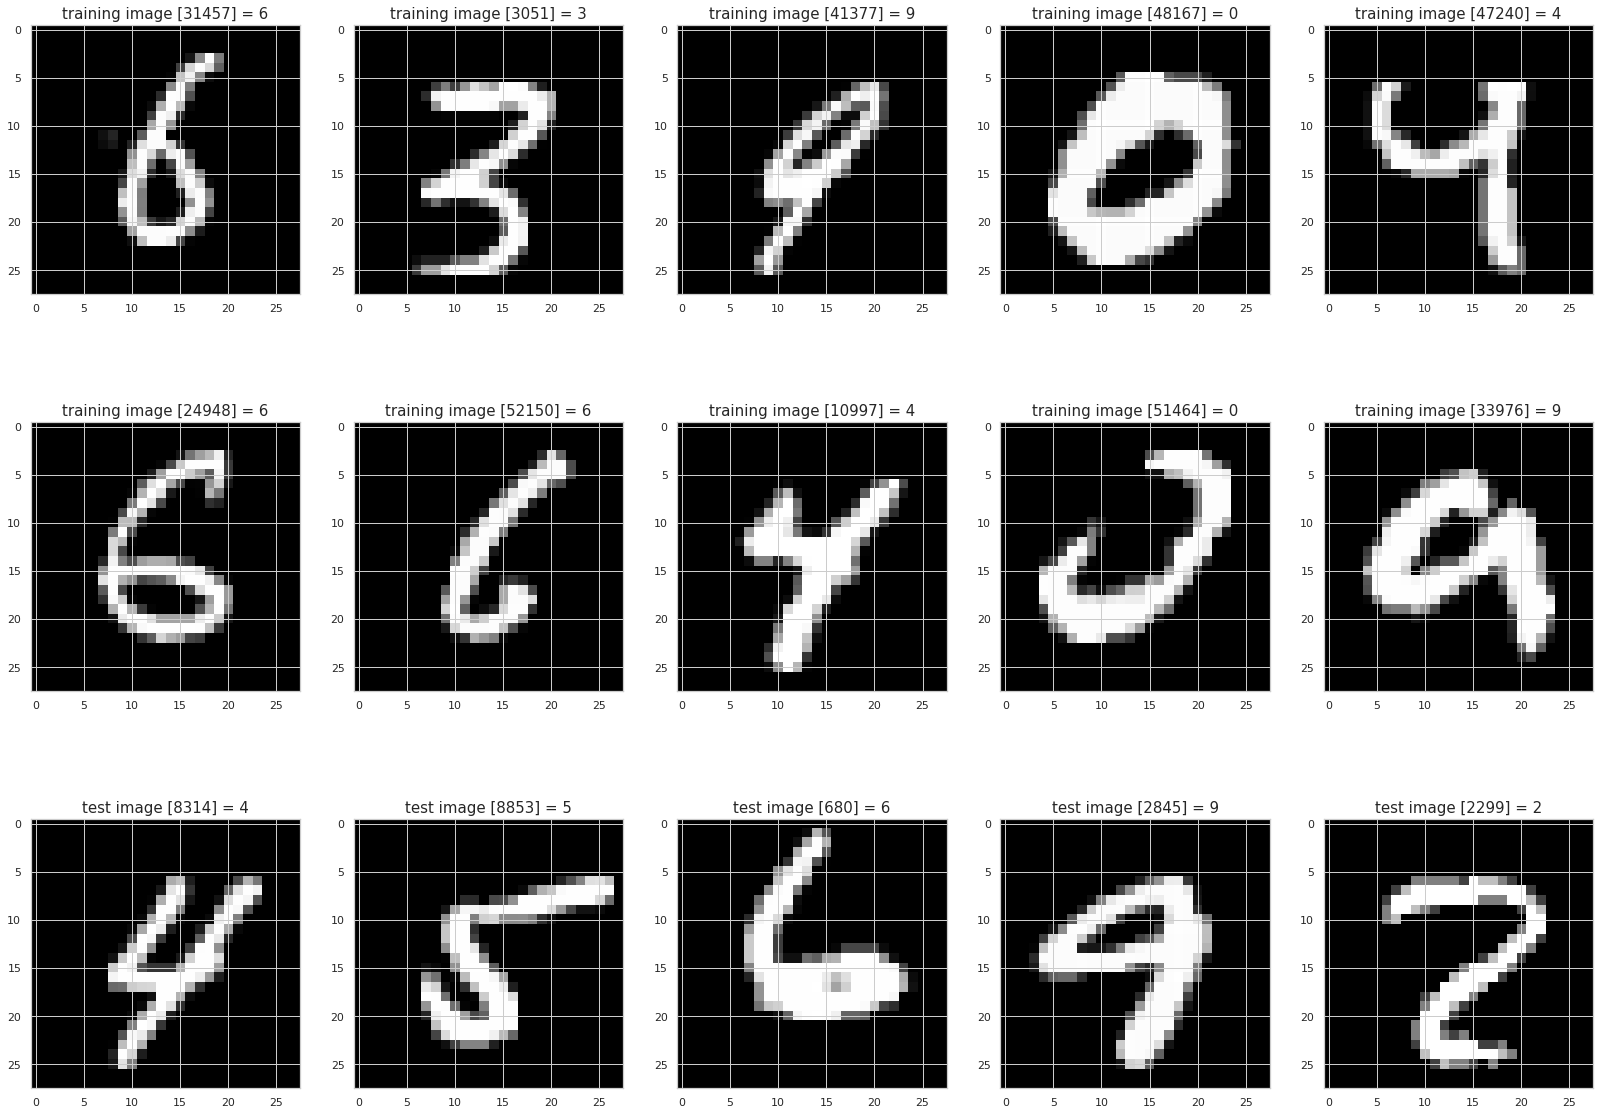

In [11]:
from os.path  import join
import struct
from array import array
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  

# Set file paths based on added MNIST Datasets
training_images_filepath = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
training_labels_filepath = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
test_images_filepath = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_filepath = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'


# Load MINST dataset
print('Loading MNIST dataset...')
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print('MNIST dataset loaded.')

# Show example images
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(28, 28))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

random_images = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    random_images.append((x_train[r], 'training image [' + str(r) + '] = ' + str(y_train[r])))
for i in range(0, 5):
    r = random.randint(1, 10000)
    random_images.append((x_test[r], 'test image [' + str(r) + '] = ' + str(y_test[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Building functions:

In [12]:

def softmax_crossentropy_with_logits(logits, reference_answers):
    # Compute crossentropy from logits[batch,n_classes] and ids of correct answers                 
    logits_for_answers = logits[np.arange(len(logits)), reference_answers]    
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits), axis=-1))    
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    # Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)), reference_answers] = 1    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)    
    return (- ones_for_answers + softmax) / logits.shape[0]

# A building block. Each layer is capable of performing two things:
#  - Process input to get output:           output = layer.forward(input)
#  - Propagate gradients through itself:    grad_input = layer.backward(input, grad_output)
# Some layers also have learnable parameters which they update during layer.backward.
class Layer(object):
    def __init__(self):        
        pass
    
    def forward(self, input):
        # Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        # A dummy layer just returns whatever it gets as input.
        return input
    
    def backward(self, input, grad_output):
        # Performs a backpropagation step through the layer, with respect to the given input.
        # To compute loss gradients w.r.t input, we need to apply chain rule (backprop):
        # d loss / d x  = (d loss / d layer) * (d layer / d x)
        # Luckily, we already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.
        # If our layer has parameters (e.g. dense layer), we also need to update them here using d loss / d layer
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly 
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units)
        return np.dot(grad_output, d_layer_d_input) # chain rule


class ReLU(Layer):
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        # Compute gradient of loss w.r.t. ReLU input
        relu_grad = input > 0
        return grad_output * relu_grad

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        # A dense layer is a layer which performs a learned affine transformation: f(x) = <W*x> + b
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, scale = np.sqrt(2 / (input_units + output_units)), size = (input_units, output_units))
        self.biases = np.zeros(output_units)
    
    def forward(self, input):
        # Perform an affine transformation: f(x) = <W*x> + b        
        # input shape: [batch, input_units]
        # output shape: [batch, output units]        
        return np.dot(input, self.weights) + self.biases
    
    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

    
class MCP(object):
    def __init__(self):
        self.layers = []
        
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def forward(self, X):
        # Compute activations of all network layers by applying them sequentially.
        # Return a list of activations for each layer. 
        activations = []
        input = X
        
        # Looping through each layer
        for l in self.layers:
            activations.append(l.forward(input))
            # Updating input to last layer output
            input = activations[-1]
    
        assert len(activations) == len(self.layers)
        return activations
    
    
    def train_batch(self, X, y):
        # Train our network on a given batch of X and y.
        # We first need to run forward to get all layer activations.
        # Then we can run layer.backward going from last to first layer.
        # After we have called backward for all layers, all Dense layers have already made one gradient step.
        
        layer_activations = self.forward(X)
        layer_inputs = [X] + layer_activations  # layer_input[i] is an input for layer[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient    
        y_argmax =  y.argmax(axis=1)        
        loss = softmax_crossentropy_with_logits(logits, y_argmax)
        loss_grad = grad_softmax_crossentropy_with_logits(logits, y_argmax)
    
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.layers))[::-1]:
            layer = self.layers[layer_index]        
            loss_grad = layer.backward(layer_inputs[layer_index], loss_grad) # grad w.r.t. input, also weight updates
        
        return np.mean(loss)
    
    def train(self, X_train, y_train, n_epochs = 25, batch_size = 32):
        train_log = []        
        
        for epoch in range(n_epochs):        
            for i in range(0, X_train.shape[0], batch_size):
                # Get pair of (X, y) of the current minibatch/chunk
                x_batch = np.array([x.flatten() for x in X_train[i:i + batch_size]])
                y_batch = np.array([y for y in y_train[i:i + batch_size]])        
                self.train_batch(x_batch, y_batch)
    
            train_log.append(np.mean(self.predict(X_train) ==  y_train.argmax(axis=-1)))                
            print(f"Epoch: {epoch + 1}, Train accuracy: {train_log[-1]}")                        
        return train_log
    
    def predict(self, X):
        # Compute network predictions. Returning indices of largest Logit probability
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

Building Model and Fitting :

X_train.shape (60000, 784)
Y_train.shape (60000, 10)
Epoch: 1, Train accuracy: 0.9260333333333334
Epoch: 2, Train accuracy: 0.9474
Epoch: 3, Train accuracy: 0.9586666666666667
Epoch: 4, Train accuracy: 0.9667333333333333
Epoch: 5, Train accuracy: 0.9722666666666666
Epoch: 6, Train accuracy: 0.9761666666666666
Epoch: 7, Train accuracy: 0.9788833333333333
Epoch: 8, Train accuracy: 0.9811666666666666
Epoch: 9, Train accuracy: 0.9831
Epoch: 10, Train accuracy: 0.9848
Epoch: 11, Train accuracy: 0.9863333333333333
Epoch: 12, Train accuracy: 0.9874833333333334
Epoch: 13, Train accuracy: 0.9888666666666667
Epoch: 14, Train accuracy: 0.9898333333333333
Epoch: 15, Train accuracy: 0.9910333333333333
Epoch: 16, Train accuracy: 0.9918
Epoch: 17, Train accuracy: 0.9925
Epoch: 18, Train accuracy: 0.9931833333333333
Epoch: 19, Train accuracy: 0.9936
Epoch: 20, Train accuracy: 0.9939833333333333
Epoch: 21, Train accuracy: 0.9946666666666667
Epoch: 22, Train accuracy: 0.9951333333333333
Epoch: 23, Train

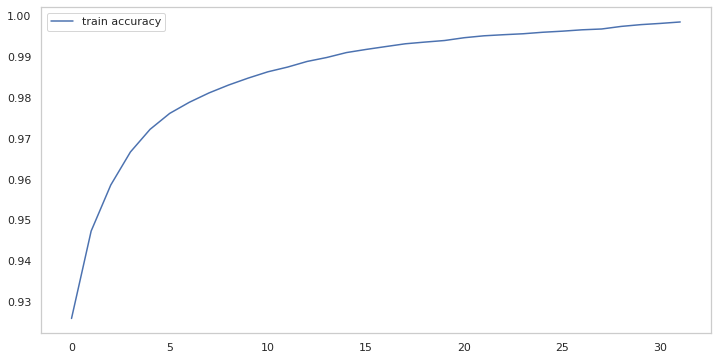

Test accuracy = 9775/10000 = 0.9775


In [13]:
def normalize(X):
    X_normalize = (X - np.min(X)) / (np.max(X) - np.min(X))
    return X_normalize   

def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[a.reshape(-1)]) 

X_train = normalize(np.array([np.ravel(x) for x in x_train]))
X_test = normalize(np.array([np.ravel(x) for x in x_test]))
Y_train = np.array([one_hot(np.array(y, dtype=int), 10) for y in y_train], dtype=int)
Y_test = np.array([one_hot(np.array(y, dtype=int), 10) for y in y_test], dtype=int)

print('X_train.shape', X_train.shape)
print('Y_train.shape', Y_train.shape)
input_size = X_train.shape[1]
output_size = Y_train.shape[1]

network = MCP()
network.add_layer(Dense(input_size, 100, learning_rate = 0.05))
network.add_layer(ReLU())
network.add_layer(Dense(100, 200, learning_rate = 0.05))
network.add_layer(ReLU())
network.add_layer(Dense(200, output_size))

train_log = network.train(X_train, Y_train, n_epochs = 32, batch_size = 64)
plt.plot(train_log,label = 'train accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


test_corrects = len(list(filter(lambda x: x == True, network.predict(X_test) ==  Y_test.argmax(axis=-1))))
test_all = len(X_test)
test_accuracy = test_corrects/test_all #np.mean(test_errors)
print(f"Test accuracy = {test_corrects}/{test_all} = {test_accuracy}")

# Evaluation

In [14]:
network.predict(X_test[1:2])

array([2])

You can “clearly” see that the most probable digit is 2

Let’s look at the image itself:

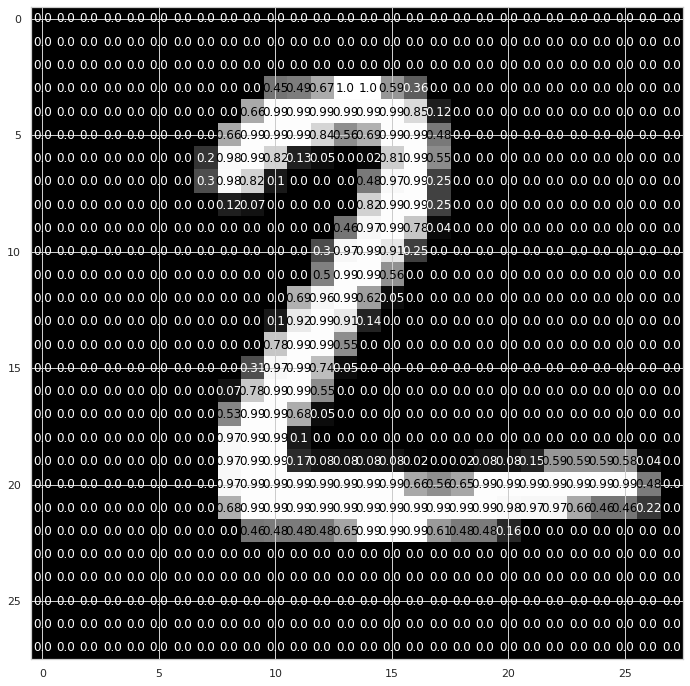

In [15]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_test[1:2].reshape(28,28), ax)

# WOW!!!!!

We’ve learned a lot about the inner workings of the Neural Network models. More importantly, we’ve implemented the backpropagation algorithm ! Hopefully, you got some practical understanding of the processes involved in training a Neural Network. Can you adapt the code and make a Deep Neural Network?

Here is another example of neural network. In this case I have used Tensorflow:  [Introduction :Learn CNN - MNIST - 99.81% accuracy ](https://www.kaggle.com/soham1024/introduction-learn-cnn-mnist-99-81-accuracy)

# If you find this notebook helpful or you just liked it , some upvotes would be very much appreciated - That will keep me motivated :)